In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the data and check if it was correctly loaded

In [27]:
df = pd.read_csv('AmesHousing.csv')
df_f = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


we can consider neighborhood as an important variable for the sale price but as we have it as a categorigal variable, we can group by the average price of the properties and clasify it in high medium or low neighborhhod

In [28]:
df_f.groupby('Neighborhood')['SalePrice'].mean().sort_values()

Neighborhood
MeadowV     95756.486486
IDOTRR     103752.903226
BrDale     105608.333333
OldTown    123991.891213
BrkSide    124756.250000
Edwards    130843.381443
SWISU      135071.937500
Sawyer     136751.152318
Landmrk    137000.000000
NPkVill    140710.869565
Blueste    143590.000000
NAmes      145097.349887
Mitchel    162226.631579
SawyerW    184070.184000
NWAmes     188406.908397
Gilbert    190646.575758
Greens     193531.250000
Blmngtn    196661.678571
CollgCr    201803.434457
Crawfor    207550.834951
ClearCr    208662.090909
Somerst    229707.324176
Timber     246599.541667
Veenker    248314.583333
GrnHill    280000.000000
NridgHt    322018.265060
StoneBr    324229.196078
NoRidge    330319.126761
Name: SalePrice, dtype: float64

Neighborhood
StoneBr    119273.020694
NoRidge    101444.662927
NridgHt     95932.354274
GrnHill     70710.678119
Timber      69326.471547
Veenker     65474.949540
Crawfor     65230.183286
Somerst     57437.392588
CollgCr     54187.843749
ClearCr     51280.213463
SawyerW     48995.503318
Edwards     48030.405046
OldTown     44327.104453
Mitchel     41356.861245
NWAmes      37687.782531
IDOTRR      36493.911013
BrkSide     35740.935575
Gilbert     33050.029652
NAmes       31882.707229
SWISU       30707.471756
Blueste     30158.523763
Blmngtn     29317.511457
Sawyer      23130.159033
Greens      21998.554133
MeadowV     20130.564823
BrDale      12144.773839
NPkVill      9340.283679
Landmrk              NaN
Name: SalePrice, dtype: float64


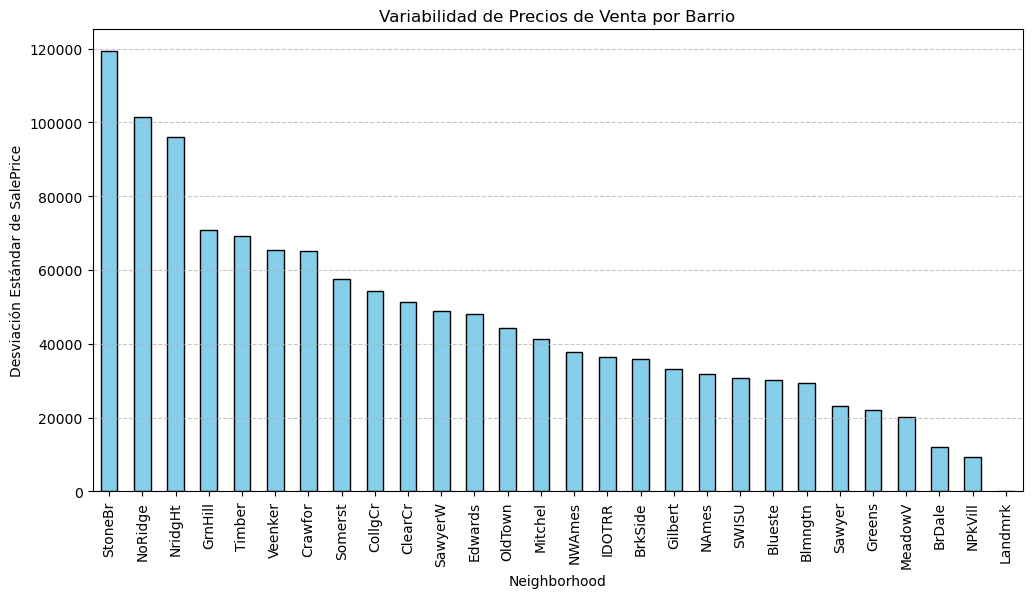

In [29]:
std_by_neighborhood = df_f.groupby('Neighborhood')['SalePrice'].std().sort_values(ascending=False)


print(std_by_neighborhood)

plt.figure(figsize=(12, 6))
std_by_neighborhood.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Neighborhood')
plt.ylabel('Desviación Estándar de SalePrice')
plt.title('Variabilidad de Precios de Venta por Barrio')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
barrio_precios = df_f.groupby('Neighborhood')['SalePrice'].mean()

p33 = np.percentile(barrio_precios, 33)
p66 = np.percentile(barrio_precios, 66)

def categorizar_barrio(precio):
    if precio <= p33:
        return 0  
    elif precio <= p66:
        return 1  
    else:
        return 2 


df_f['Neighborhood_Category'] = df_f['Neighborhood'].map(lambda x: categorizar_barrio(barrio_precios[x]))

df_f.drop(columns=['Neighborhood'], inplace=True)
print(df_f['Neighborhood_Category'].value_counts())


Neighborhood_Category
1    1047
2     982
0     901
Name: count, dtype: int64


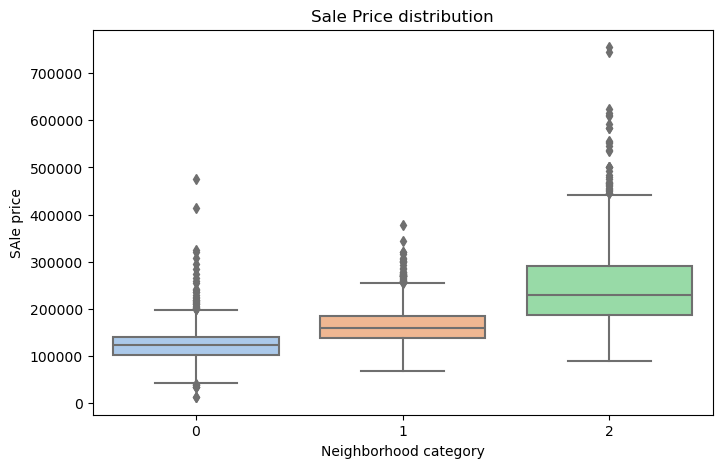

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Neighborhood_Category", y="SalePrice", data=df_f, palette="pastel")

plt.xlabel("Neighborhood category")
plt.ylabel("SAle price")
plt.title("Sale Price distribution")
plt.show()


here we can see the distribution of the neighborhoods depending on it´s Sale price

we can try to do the same with other categorical variables that we consider important like Ms_Zoning

In [32]:
zoning_mapping = {
    'FV': 'High',  # Floating 
    'RH': 'Medium',  # Residential High Density
    'RL': 'Medium',  # Residential Low Density
    'RM': 'Low',  # Residential Medium Density
    'C (all)': 'Low',  # Comercial
    'I': 'Low'  # Industrial
}

df_f['MS_Zoning_Grouped'] = df_f['MS Zoning'].map(zoning_mapping)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_f['MS_Zoning_Encoded'] = encoder.fit_transform(df_f['MS_Zoning_Grouped'])
df_f.drop(columns=['MS Zoning', 'MS_Zoning_Grouped'], inplace=True)

In [33]:
df_f['Mas Vnr Type'].unique()

array(['Stone', nan, 'BrkFace', 'BrkCmn', 'CBlock'], dtype=object)

<h2>one-hot encoding</h2>

if the rest of the variables are not considered to have a jererchy we can treat them as nominal variables and use one hot encoding

In [34]:
nominal_vars = [
    'Street', 'Alley', 'Condition 1', 'Condition 2',
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Foundation', 'Heating', 'Garage Type',
    'Misc Feature', 'Sale Type', 'Sale Condition', 'Land Contour', 'Lot Config', 'Electrical'
]

nominal_vars = [col for col in nominal_vars if col in df.columns]

df_f= pd.get_dummies(df_f, columns=nominal_vars, drop_first=True)  # drop_first evita multicolinealidad

print(f"Transfrmed variables with One-Hot Encoding: {nominal_vars}")


Transfrmed variables with One-Hot Encoding: ['Street', 'Alley', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition', 'Land Contour', 'Lot Config', 'Electrical']


<h2>Label Encoding</h2>

the variables that are considered to have a jerarchy can be treated as ordinal variables and use label encoding

In [35]:
ordinal_mappings = {
    'Lot Shape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'Land Slope': ['Sev', 'Mod', 'Gtl'],
    'Exter Qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Exter Cond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Exposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFin Type 1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFin Type 2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Heating QC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Kitchen Qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fireplace Qu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Finish': ['NA', 'Unf', 'RFn', 'Fin'],
    'Garage Qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Paved Drive': ['N', 'P', 'Y'],
    'Pool QC': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'Utilities' : ['AllPub', 'NoSewr', 'NoSeWa'],
    'Central Air' : ['Y', 'N'],
    'Mas Vnr Type': ['Stone', 'nan', 'BrkFace', 'BrkCmn', 'CBlock']
}


ordinal_mappings = {col: order for col, order in ordinal_mappings.items() if col in df_f.columns}

for col, order in ordinal_mappings.items():
    df_f[col] = df_f[col].astype(pd.CategoricalDtype(categories=order, ordered=True))  
    df_f[col] = df_f[col].cat.codes  

print("Completed Transformations:")
print(f"Label Encoding applied to: {list(ordinal_mappings.keys())}")


Completed Transformations:
Label Encoding applied to: ['Lot Shape', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Functional', 'Utilities', 'Central Air', 'Mas Vnr Type']


In [36]:
object_cols = df_f.select_dtypes(include=['object']).columns
print(object_cols)


Index([], dtype='object')


<h2>Correlation</h2>

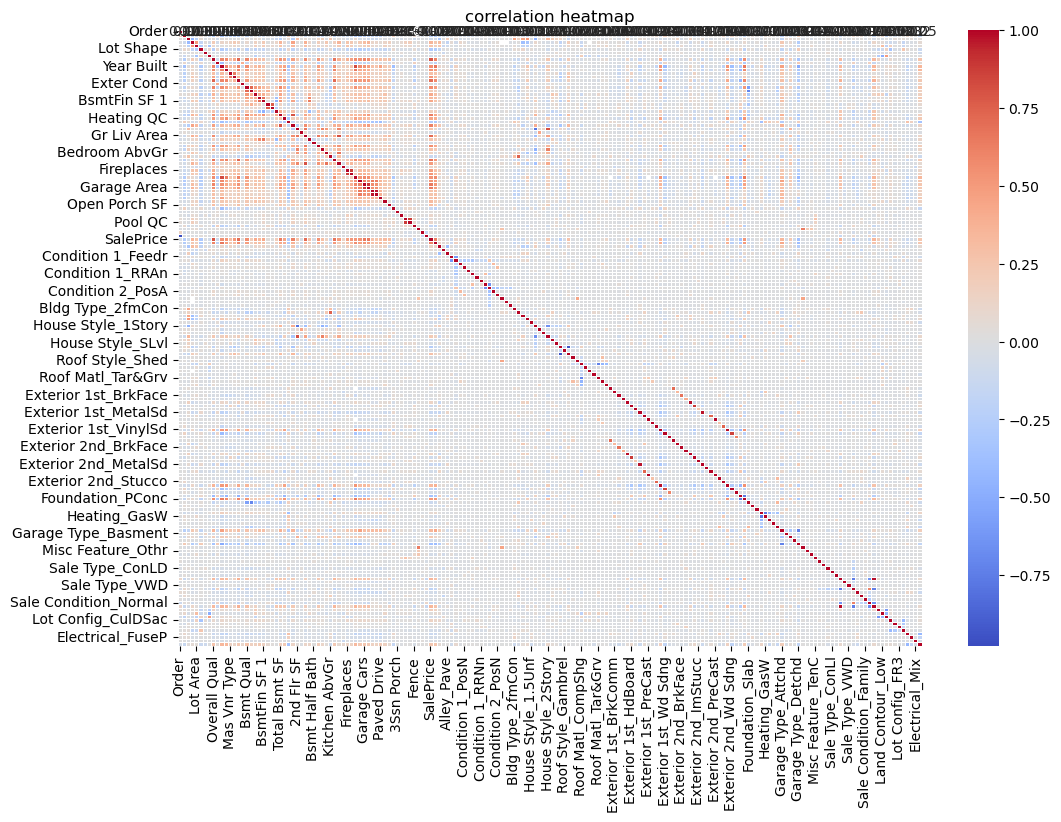

In [37]:
df_f.corr()
corr_matrix = df_f.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("correlation heatmap")
plt.show()

Columns with a very high correlation can be redundant, so we can drop some of this columns

In [38]:
threshold = 0.85  

corr_matrix = df_f.corr()

columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: 
            colname = corr_matrix.columns[i]  
            columns_to_drop.add(colname)  

df_filtered = df_f.drop(columns=columns_to_drop)


print("dropped columns", columns_to_drop)


dropped columns {'Pool QC', 'Exterior 2nd_CmentBd', 'Exterior 2nd_Wd Sdng', 'Garage Area', 'Exterior 2nd_HdBoard', 'Sale Condition_Partial', 'Fireplace Qu', 'Garage Cond', 'Roof Style_Hip', 'Exterior 2nd_MetalSd', 'Exterior 2nd_PreCast', 'Yr Sold', 'Exterior 2nd_VinylSd'}


**We have too many variables**, we need to focus on the variables that have the highest correlation with SalePrice

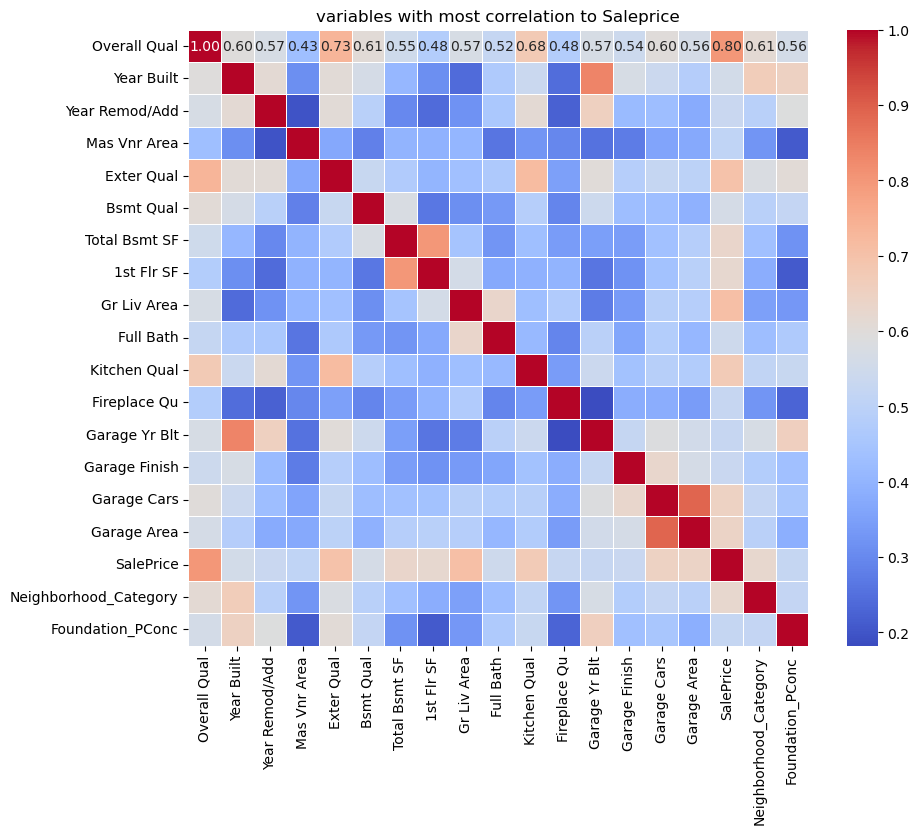

In [39]:
corr_matrix = df_f.corr()

top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

plt.figure(figsize=(10, 8))
sns.heatmap(df_f[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("variables with most correlation to Saleprice")
plt.show()


In [40]:
correlation = df_f[['MS_Zoning_Encoded', 'SalePrice']].corr().iloc[0,1]
print(f"Correlation between MS_Zoning_Encoded y SalePrice: {correlation:.4f}")

Correlation between MS_Zoning_Encoded y SalePrice: 0.1301


it seems like zonig was not as related as we expected it to be

for efficiency purposes we can drop the columns that have a correlation with Sales price lower thatn 0.5

In [41]:
threshold = 0.5

correlation_matrix = df_f.corr()
correlation_with_saleprice = correlation_matrix["SalePrice"].abs()

# Seleccionar variables con correlación mayor al umbral
high_corr_features = correlation_with_saleprice[correlation_with_saleprice > threshold].index.tolist()

# Lista de variables que queremos mantener aunque tengan baja correlación
variables_a_conservar = ["PID", "Mas Vnr Type"]


final_features = list(set(variables_a_conservar + high_corr_features))

# Crear un nuevo DataFrame con las variables seleccionadas
df_f= df_f[final_features]

print("Selected Variables", df_f.columns)



Selected Variables Index(['Exter Qual', 'Bsmt Qual', 'Fireplace Qu', 'Year Remod/Add', 'PID',
       'Overall Qual', 'SalePrice', 'Kitchen Qual', 'Total Bsmt SF',
       '1st Flr SF', 'Garage Cars', 'Garage Yr Blt', 'Gr Liv Area',
       'Neighborhood_Category', 'Garage Area', 'Mas Vnr Type', 'Garage Finish',
       'Mas Vnr Area', 'Year Built', 'Foundation_PConc', 'Full Bath'],
      dtype='object')


In [42]:
df_f.insert(0, 'PID', df_f.pop('PID'))

In [43]:
df_f.head()

,PID,Exter Qual,Bsmt Qual,Fireplace Qu,Year Remod/Add,Overall Qual,SalePrice,Kitchen Qual,Total Bsmt SF,1st Flr SF,...,Garage Yr Blt,Gr Liv Area,Neighborhood_Category,Garage Area,Mas Vnr Type,Garage Finish,Mas Vnr Area,Year Built,Foundation_PConc,Full Bath
0,526301100,2,3,4,1960,6,215000,2,1080.0,1656,...,1960.0,1656,1,528.0,0,3,112.0,1960,False,1
1,526350040,2,3,-1,1961,5,105000,2,882.0,896,...,1961.0,896,1,730.0,-1,1,0.0,1961,False,1
2,526351010,2,3,-1,1958,6,172000,3,1329.0,1329,...,1958.0,1329,1,312.0,2,1,108.0,1958,False,1
3,526353030,3,3,3,1968,7,244000,4,2110.0,2110,...,1968.0,2110,1,522.0,-1,3,0.0,1968,False,2
4,527105010,2,4,3,1998,5,189900,2,928.0,928,...,1997.0,1629,1,482.0,-1,3,0.0,1997,True,2


In [44]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PID                    2930 non-null   int64  
 1   Exter Qual             2930 non-null   int8   
 2   Bsmt Qual              2930 non-null   int8   
 3   Fireplace Qu           2930 non-null   int8   
 4   Year Remod/Add         2930 non-null   int64  
 5   Overall Qual           2930 non-null   int64  
 6   SalePrice              2930 non-null   int64  
 7   Kitchen Qual           2930 non-null   int8   
 8   Total Bsmt SF          2929 non-null   float64
 9   1st Flr SF             2930 non-null   int64  
 10  Garage Cars            2929 non-null   float64
 11  Garage Yr Blt          2771 non-null   float64
 12  Gr Liv Area            2930 non-null   int64  
 13  Neighborhood_Category  2930 non-null   int64  
 14  Garage Area            2929 non-null   float64
 15  Mas 

we still have null values, so let´s check where we have the null values, why?

we replace the nan garage year built for the property year built 

In [45]:
df_f['Garage Yr Blt'].fillna(df_f['Year Built'], inplace=True)

In [46]:
df_f.loc[df['Mas Vnr Area'].isnull() & (df_f['Mas Vnr Type'] == -1), 'Mas Vnr Area'] = 0

In [47]:
df_f['Mas Vnr Type'].unique()

array([ 0, -1,  2,  3,  4], dtype=int8)

In [48]:
df_f[df_f['Mas Vnr Area'].isnull()]

,PID,Exter Qual,Bsmt Qual,Fireplace Qu,Year Remod/Add,Overall Qual,SalePrice,Kitchen Qual,Total Bsmt SF,1st Flr SF,...,Garage Yr Blt,Gr Liv Area,Neighborhood_Category,Garage Area,Mas Vnr Type,Garage Finish,Mas Vnr Area,Year Built,Foundation_PConc,Full Bath


In [49]:
df_f.loc[df['Garage Cars'].isnull() & df['Garage Finish'].isnull(),'Garage Cars']= 0
df_f.loc[df['Garage Cars'].isnull() & df['Garage Finish'].isnull(),'Garage Area']= 0

In [50]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PID                    2930 non-null   int64  
 1   Exter Qual             2930 non-null   int8   
 2   Bsmt Qual              2930 non-null   int8   
 3   Fireplace Qu           2930 non-null   int8   
 4   Year Remod/Add         2930 non-null   int64  
 5   Overall Qual           2930 non-null   int64  
 6   SalePrice              2930 non-null   int64  
 7   Kitchen Qual           2930 non-null   int8   
 8   Total Bsmt SF          2929 non-null   float64
 9   1st Flr SF             2930 non-null   int64  
 10  Garage Cars            2930 non-null   float64
 11  Garage Yr Blt          2930 non-null   float64
 12  Gr Liv Area            2930 non-null   int64  
 13  Neighborhood_Category  2930 non-null   int64  
 14  Garage Area            2930 non-null   float64
 15  Mas 

Now we can start with the model

In [51]:
df_f = df_f.apply(pd.to_numeric, errors='coerce')
df_f = df_f.replace([np.inf, -np.inf], np.nan).dropna()
print(df_f.isnull().sum())

PID                      0
Exter Qual               0
Bsmt Qual                0
Fireplace Qu             0
Year Remod/Add           0
Overall Qual             0
SalePrice                0
Kitchen Qual             0
Total Bsmt SF            0
1st Flr SF               0
Garage Cars              0
Garage Yr Blt            0
Gr Liv Area              0
Neighborhood_Category    0
Garage Area              0
Mas Vnr Type             0
Garage Finish            0
Mas Vnr Area             0
Year Built               0
Foundation_PConc         0
Full Bath                0
dtype: int64


In [52]:
df_f['Foundation_PConc'] = df_f['Foundation_PConc'].astype(int)

<h2> Variance inflation factor</h2>

We need to detect high collienarity between variables so it doesn´t affect our model

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df_f):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_f.columns
    vif_data["VIF"] = [variance_inflation_factor(df_f.values, i) for i in range(df_f.shape[1])]
    return vif_data

X = df_f.drop(columns=["SalePrice"])  # Excluir la variable objetivo
vif_df = calculate_vif(X)
print(vif_df)

                 Variable           VIF
0                     PID     18.214071
1              Exter Qual     54.782248
2               Bsmt Qual     34.107742
3            Fireplace Qu      1.989524
4          Year Remod/Add  12376.505118
5            Overall Qual     71.767888
6            Kitchen Qual     37.126267
7           Total Bsmt SF     33.716424
8              1st Flr SF     44.503724
9             Garage Cars     38.162362
10          Garage Yr Blt  23607.076216
11            Gr Liv Area     26.597118
12  Neighborhood_Category      5.508163
13            Garage Area     33.109634
14           Mas Vnr Type      1.854908
15          Garage Finish      7.231677
16           Mas Vnr Area      2.855639
17             Year Built  21255.655455
18       Foundation_PConc      3.668850
19              Full Bath     18.791721


*Let´s drop the colums with the highest VIF

In [54]:
df_f = df_f.drop(['PID','Garage Yr Blt','Garage Cars','Year Built','Year Remod/Add','1st Flr SF','Exter Qual','Bsmt Qual','Overall Qual'], axis=1)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df_f):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_f.columns
    vif_data["VIF"] = [variance_inflation_factor(df_f.values, i) for i in range(df_f.shape[1])]
    return vif_data

X = df_f.drop(columns=["SalePrice"])  # Excluir la variable objetivo
vif_df = calculate_vif(X)
print(vif_df)

                 Variable        VIF
0            Fireplace Qu   1.761952
1            Kitchen Qual  17.420792
2           Total Bsmt SF  10.189719
3             Gr Liv Area  21.632275
4   Neighborhood_Category   4.772994
5             Garage Area  11.385027
6            Mas Vnr Type   1.805562
7           Garage Finish   6.418773
8            Mas Vnr Area   2.736329
9        Foundation_PConc   2.803397
10              Full Bath  17.016719


Now we can try different models to see wich one is better in this case

<h2>Ridge Regression</h2>

In [56]:
from sklearn.linear_model import Ridge
X = df_f[['Garage Area', 'Mas Vnr Area', 'Kitchen Qual', 'Garage Finish', 
        'Neighborhood_Category', 'Total Bsmt SF', 'Fireplace Qu', 
        'Mas Vnr Type', 'Full Bath', 'Foundation_PConc', 'Gr Liv Area']]

y = df_f['SalePrice'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=10)


ridge_model.fit(X_train_scaled, y_train)


y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.4f}')

MSE: 2080595226.84
R² Score: 0.7208


In [57]:
rmse = np.sqrt(2084813227.44)
print(rmse)  

45659.755008541164


For better results we look for the best hyper parameters

In [58]:
from sklearn.linear_model import RidgeCV
alphas = [0.1, 1, 10, 100, 1000]

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

# Mostrar el mejor alpha encontrado
print(f"Mejor alpha: {ridge_cv.alpha_}")

Mejor alpha: 10.0


C:\Users\juan esteban\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2375: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Now we try with Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

X = df_f[['Garage Area', 'Mas Vnr Area', 'Kitchen Qual', 'Garage Finish', 
        'Neighborhood_Category', 'Total Bsmt SF', 'Fireplace Qu', 
        'Mas Vnr Type', 'Full Bath', 'Foundation_PConc', 'Gr Liv Area']]

y = df_f['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


y_pred = linear_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 2085290846.16
R² Score: 0.7201


In [60]:
rmse = np.sqrt(2084813227.44)
print(rmse)  

45659.755008541164


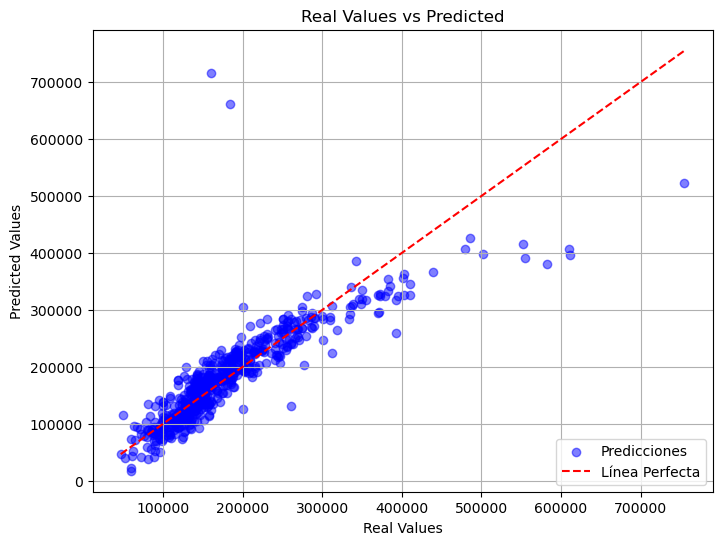

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Perfecta')

plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real Values vs Predicted")
plt.legend()
plt.grid(True)

Let´s check the correlation between variables and Sale Prices

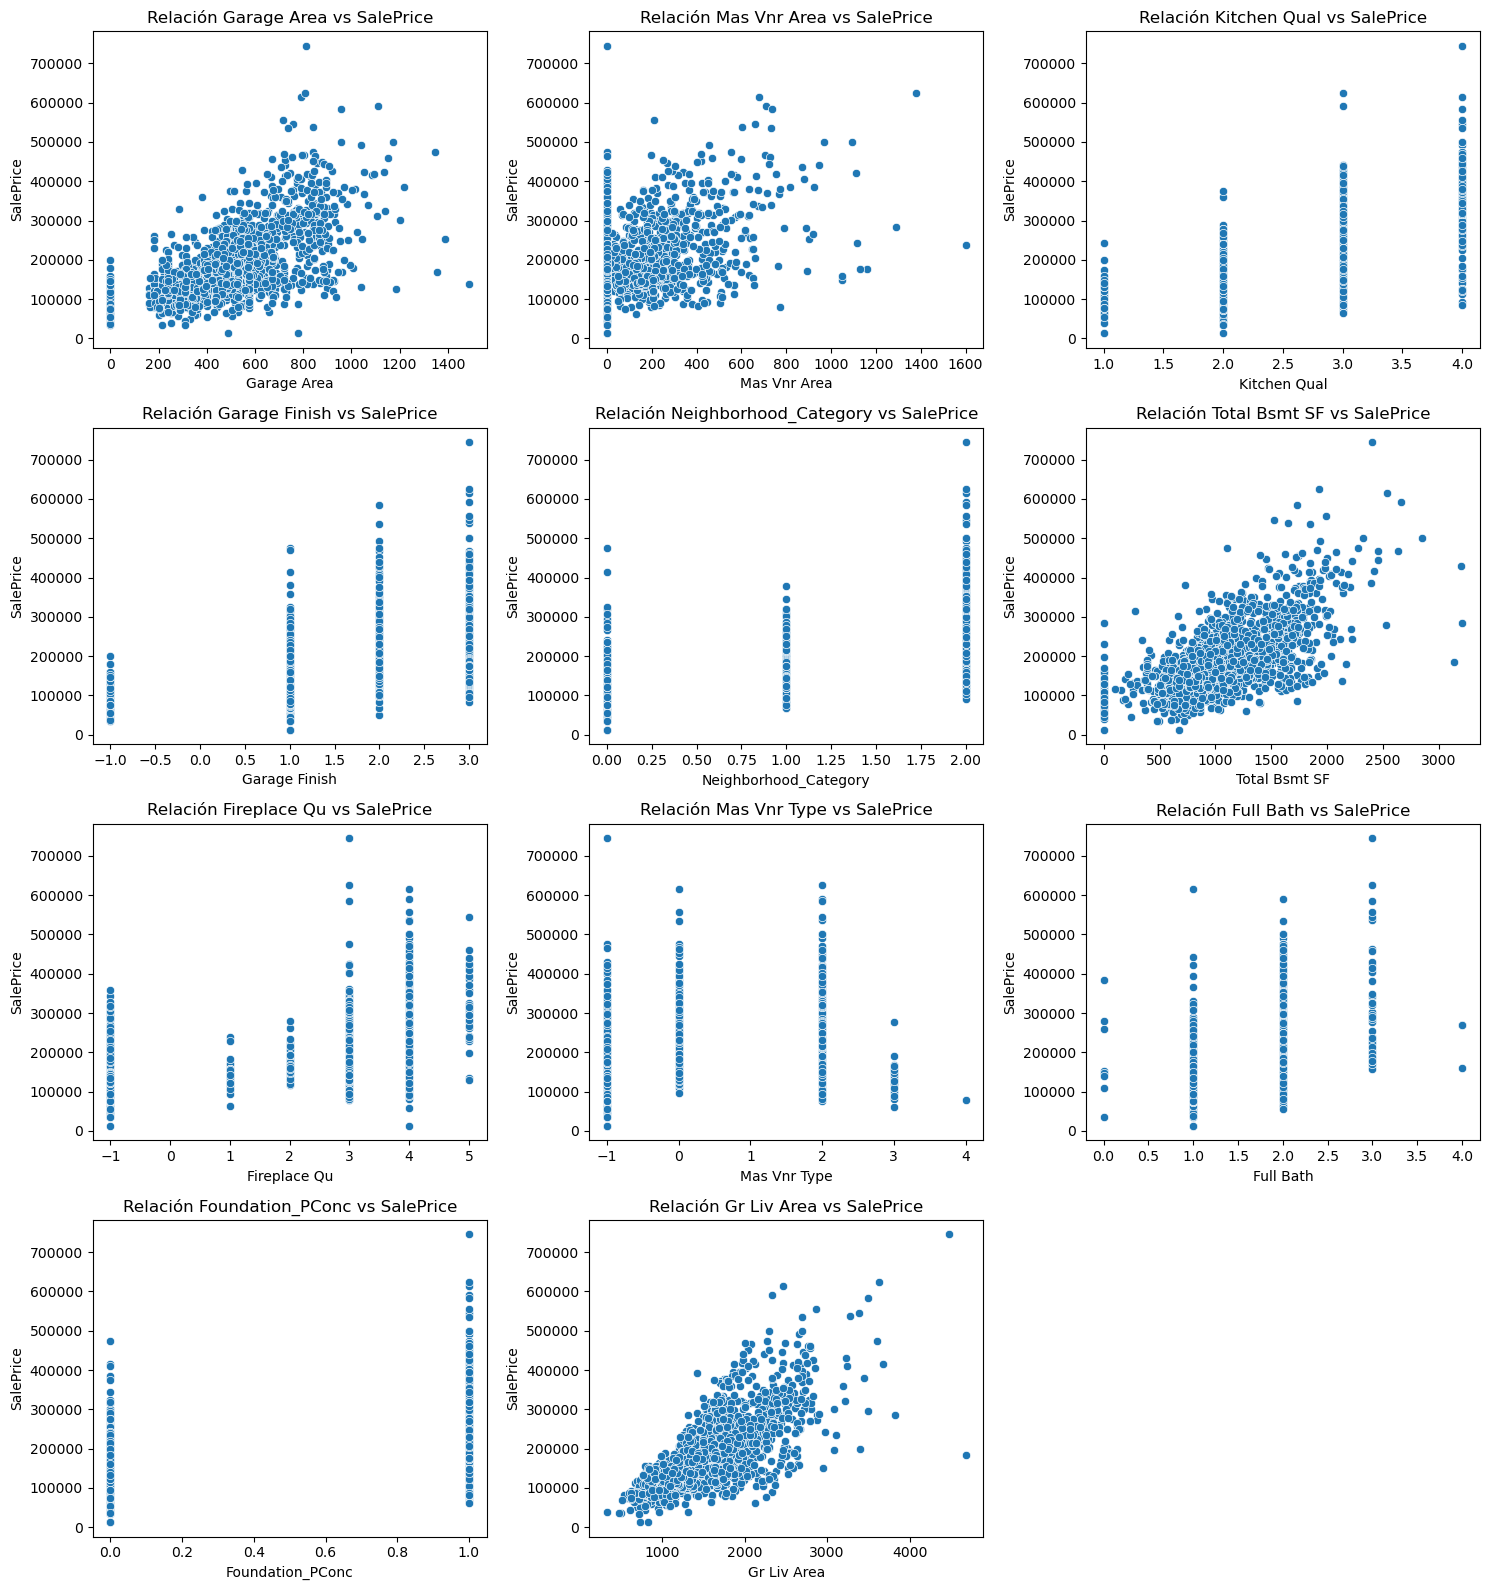

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de columnas a graficar
num_vars = X_train.shape[1]
cols = 3  # Número de columnas en el grid
rows = math.ceil(num_vars / cols)  # Filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Asegurar que axes sea un arreglo bidimensional
axes = axes.reshape(-1)

# Generar gráficos de dispersión para cada variable
for i, col in enumerate(X_train.columns):
    sns.scatterplot(x=X_train[col], y=y_train, ax=axes[i])
    axes[i].set_title(f'Relación {col} vs SalePrice')

# Eliminar subplots vacíos si hay menos variables que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [40]:
df_f = df_f.drop(['Mas Vnr Type','Fireplace Qu','Garage Finish','Kitchen Qual','Foundation_PConc'], axis=1)


In [41]:
X = df_f[['Garage Area', 'Mas Vnr Area','Neighborhood_Category', 'Total Bsmt SF', 'Full Bath', 'Gr Liv Area']]

In [42]:
from sklearn.linear_model import LinearRegression

X = df_f[['Garage Area', 'Mas Vnr Area','Neighborhood_Category', 'Total Bsmt SF', 'Full Bath', 'Gr Liv Area']]

y = df_f['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


y_pred = linear_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 2485888421.86
R² Score: 0.6664


In [43]:
rmse = np.sqrt(2084813227.44)
print(rmse)  

45659.755008541164


Let´s try a different type of model
<h2>DecisionTree</h2>

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [45]:
# Hacer predicciones
y_pred = tree_model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 1464686353.72
R² Score: 0.8034


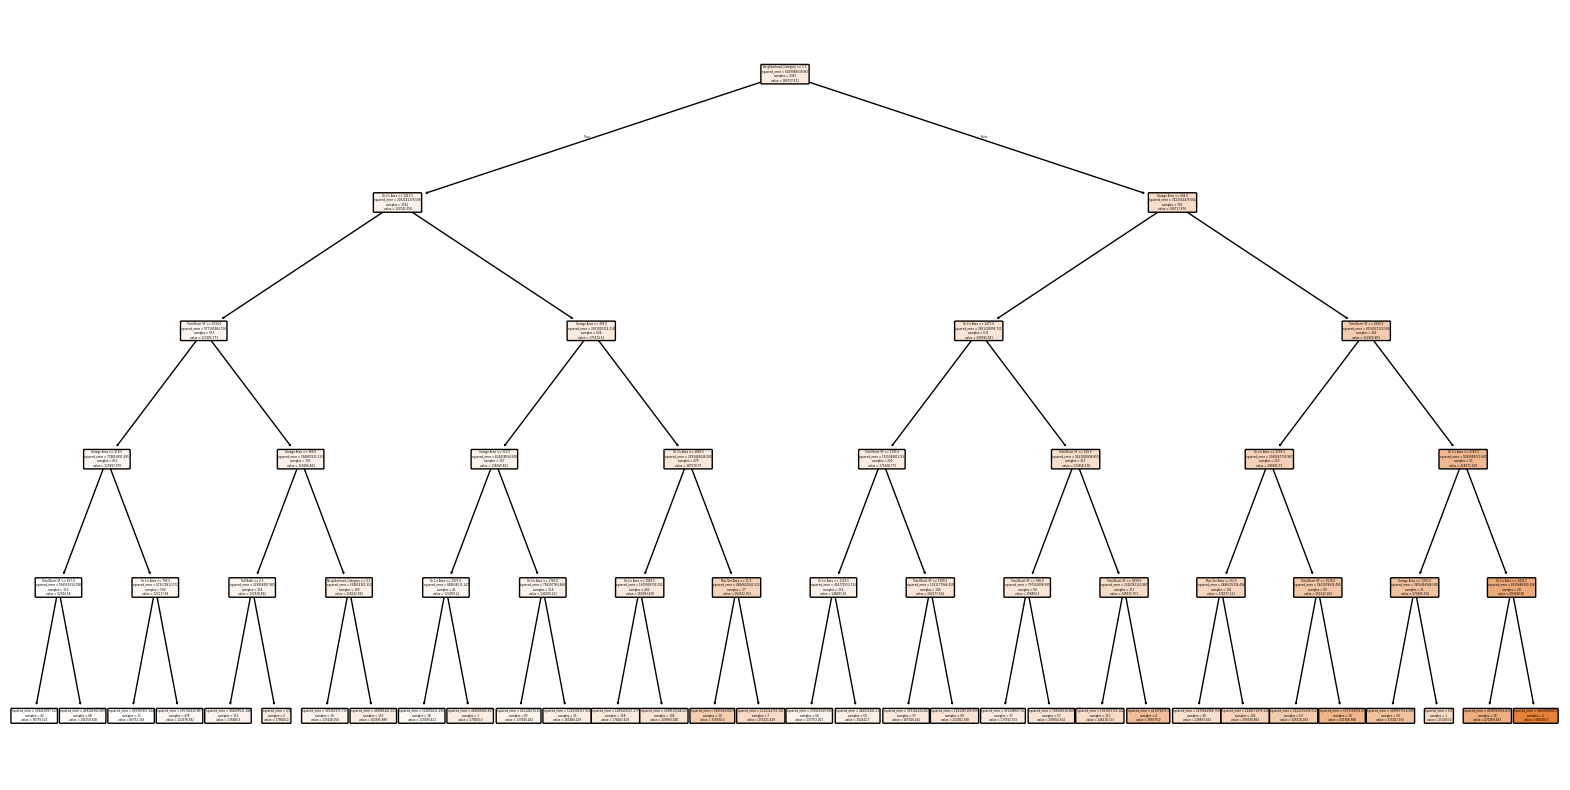

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


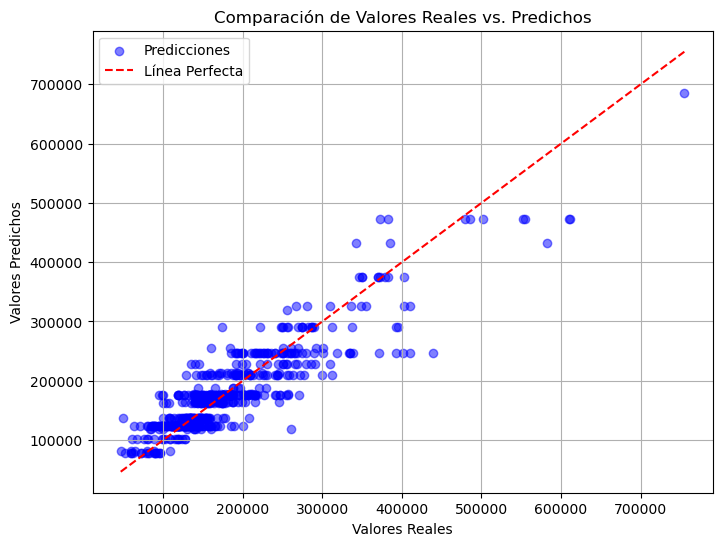

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Perfecta')

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()
plt.grid(True)


plt.show()

We need to adjust the model

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)


param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.001, 0.01, 0.1]
}


grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_tree = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'ccp_alpha': 0.001, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20}


In [51]:
best_params = grid_search.best_params_

final_tree = DecisionTreeRegressor(**best_params, random_state=42)

final_tree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.001, max_depth=15, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=20,
                      random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = final_tree.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


MSE: 1668853193.4094567
R²: 0.7760270578602482


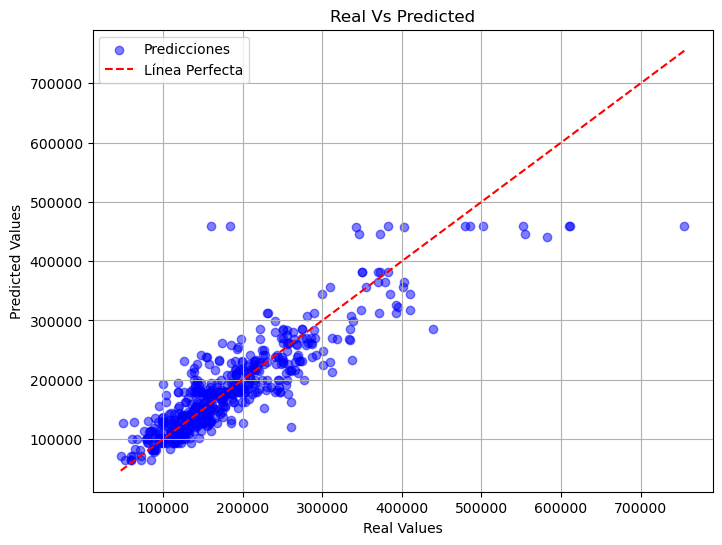

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Perfecta')

plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real Vs Predicted")
plt.legend()
plt.grid(True)


plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Mejores parámetros: {grid_search.best_params_}')
print(f'Mejor R² en validación cruzada: {grid_search.best_score_}')

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mejor R² en validación cruzada: 0.8589083008618917


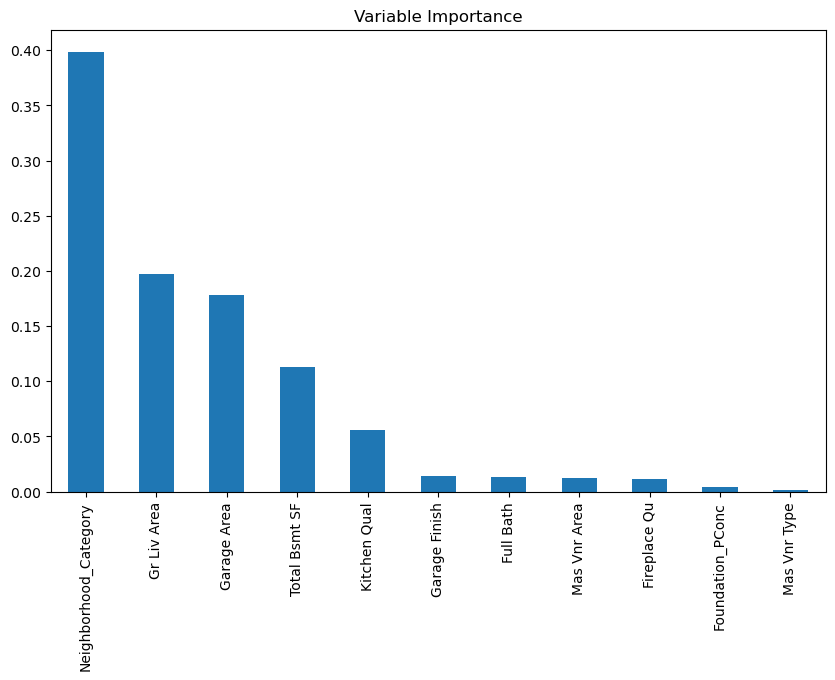

In [65]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importances.head(15).plot(kind='bar')
plt.title('Variable Importance')
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print(f'R² promedio en validación cruzada: {cv_scores.mean()}')

R² promedio en validación cruzada: 0.8557867011494947


<h2>Conclution</h2>

<p>the best model was the regression tree model after finding the best parameters, it has a slightly lower r2 Value¨but if we anlyse the graphs we can se that it has an important disperssion <p>